<a href="https://colab.research.google.com/github/SUBHRA15012001/Subhra-VS/blob/main/Satellite_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
## Importing satellite images dataset
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

satellite-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/satellite-image-classification.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  kaggle.json  sample_data	satellite-image-classification.zip


In [ ]:
## Importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_cloud_files = os.listdir('/content/data/cloudy')
print (with_cloud_files[0:5])
print(with_cloud_files[-5:])

['train_37592.jpg', 'train_17702.jpg', 'train_16059.jpg', 'train_20141.jpg', 'train_39500.jpg']
['train_35506.jpg', 'train_3165.jpg', 'train_25953.jpg', 'train_33933.jpg', 'train_14869.jpg']


In [ ]:
with_desert_files = os.listdir('/content/data/desert')
print (with_desert_files[0:5])
print(with_desert_files[-5:])

['desert(145).jpg', 'desert(711).jpg', 'desert(377).jpg', 'desert(901).jpg', 'desert(821).jpg']
['desert(212).jpg', 'desert(1035).jpg', 'desert(709).jpg', 'desert(458).jpg', 'desert(775).jpg']


In [ ]:
with_grassfeild_files = os.listdir('/content/data/green_area')
print (with_grassfeild_files[0:5])
print(with_grassfeild_files[-5:])

['Forest_203.jpg', 'Forest_40.jpg', 'Forest_888.jpg', 'Forest_337.jpg', 'Forest_2847.jpg']
['Forest_2119.jpg', 'Forest_2241.jpg', 'Forest_611.jpg', 'Forest_2223.jpg', 'Forest_69.jpg']


In [ ]:
with_water_files = os.listdir('/content/data/water')
print (with_water_files[0:5])
print(with_water_files[-5:])

['SeaLake_801.jpg', 'SeaLake_777.jpg', 'SeaLake_866.jpg', 'SeaLake_2600.jpg', 'SeaLake_2377.jpg']
['SeaLake_795.jpg', 'SeaLake_724.jpg', 'SeaLake_1533.jpg', 'SeaLake_1749.jpg', 'SeaLake_2505.jpg']


In [ ]:
print('Number of with cloud images:', len(with_cloud_files))
print('Number of without desert images:', len(with_desert_files))
print('Number of without grassfeild images:', len(with_grassfeild_files))
print('Number of without water images:', len(with_water_files))

Number of with cloud images: 1500
Number of without desert images: 1131
Number of without grassfeild images: 1500
Number of without water images: 1500


In [ ]:
## creating labels for the two class of images
# with_mask=1
# without_mask=0
with_cloud_label=[0]*1500
with_desert_label=[1]*1131
with_grassfeild_label=[2]*1500
with_water_label=[3]*1500

In [ ]:
print(with_cloud_label[0:5])
print(with_desert_label[0:5])
print(with_grassfeild_label[0:5])
print(with_water_label[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]


In [ ]:
print(len(with_cloud_label))
print(len(with_desert_label))
print(len(with_grassfeild_label))
print(len(with_water_label))

1500
1131
1500
1500


In [ ]:
labels=with_cloud_label + with_desert_label + with_grassfeild_label + with_water_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

5631
[0, 0, 0, 0, 0]
[3, 3, 3, 3, 3]


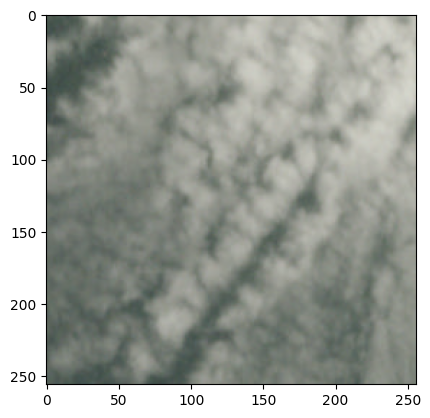

In [ ]:
# Displaying the images
# display with pneumonia image
img=mpimg.imread('/content/data/cloudy/train_37592.jpg')
imgplot = plt.imshow(img)
plt.show()

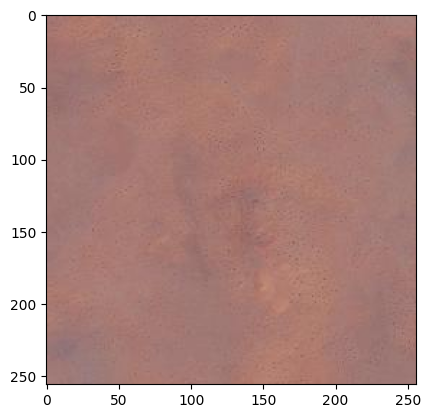

In [ ]:
# display without mask image
img=mpimg.imread('/content/data/desert/desert(145).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img=mpimg.imread('/content/data/green_area/Forest_203.jpg')
imgplot = plt.imshow(img)
plt.show()

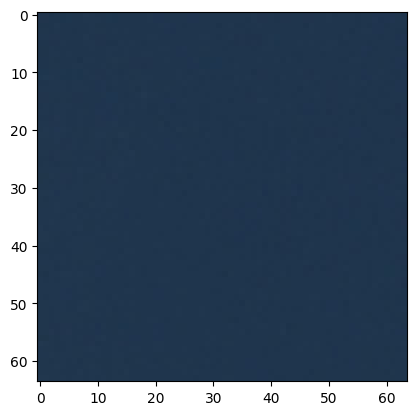

In [ ]:
img=mpimg.imread('/content/data/water/SeaLake_795.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# As images are of differnent size we need to take care of this during image processing
#IMAGE PROCESSING
#1. Resize image
#2. convert images to numpy arrays



In [ ]:
# convert images to numpy arrays
with_cloud_path = '/content/data/cloudy/'

data = []

for img_file in with_cloud_files:
  image = Image.open(with_cloud_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)




  with_desert_path = '/content/data/desert/'



for img_file in with_desert_files:
  image = Image.open(with_desert_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


with_grassfeild_path = '/content/data/green_area/'



for img_file in with_grassfeild_files:
  image = Image.open(with_grassfeild_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

  with_water_path = '/content/data/water/'



for img_file in with_water_files:
  image = Image.open(with_water_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)









In [ ]:
type(data)

list

In [ ]:
data[0]


array([[[ 85,  98,  90],
        [ 84,  96,  89],
        [ 75,  88,  81],
        ...,
        [169, 170, 160],
        [186, 185, 176],
        [194, 194, 186]],

       [[ 77,  91,  81],
        [ 79,  92,  82],
        [ 74,  87,  77],
        ...,
        [165, 169, 159],
        [183, 184, 174],
        [193, 193, 184]],

       [[ 71,  85,  77],
        [ 72,  85,  78],
        [ 71,  84,  77],
        ...,
        [163, 167, 157],
        [181, 184, 174],
        [193, 194, 184]],

       ...,

       [[ 84,  97,  93],
        [ 87, 101,  94],
        [ 85,  98,  90],
        ...,
        [131, 139, 129],
        [125, 133, 122],
        [123, 131, 119]],

       [[ 83,  96,  89],
        [ 85,  99,  89],
        [ 83,  96,  88],
        ...,
        [133, 138, 131],
        [126, 132, 124],
        [123, 130, 119]],

       [[ 85,  96,  88],
        [ 86,  97,  88],
        [ 83,  94,  88],
        ...,
        [130, 136, 127],
        [124, 130, 120],
        [119, 128, 117]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
len(data)

5631

In [ ]:
# converting image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(5631, 128, 128, 3)
(5631,)


In [ ]:
print(Y)

[0 0 0 ... 3 3 3]


In [ ]:
# Split train test


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape,X_test.shape)

(5631, 128, 128, 3) (4504, 128, 128, 3) (1127, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.66666667, 0.50196078, 0.50588235],
        [0.66666667, 0.50588235, 0.49803922],
        [0.6745098 , 0.50196078, 0.49019608],
        ...,
        [0.68627451, 0.49411765, 0.46666667],
        [0.68235294, 0.49411765, 0.46666667],
        [0.68235294, 0.49411765, 0.46666667]],

       [[0.66666667, 0.50588235, 0.49803922],
        [0.66666667, 0.50588235, 0.49803922],
        [0.6745098 , 0.50196078, 0.49019608],
        ...,
        [0.67058824, 0.48235294, 0.45882353],
        [0.65882353, 0.4745098 , 0.45098039],
        [0.65882353, 0.4745098 , 0.45098039]],

       [[0.66666667, 0.50588235, 0.49019608],
        [0.66666667, 0.50588235, 0.49019608],
        [0.6745098 , 0.50196078, 0.49019608],
        ...,
        [0.63921569, 0.4627451 , 0.43921569],
        [0.63529412, 0.45882353, 0.43529412],
        [0.63529412, 0.45882353, 0.43529412]],

       ...,

       [[0.67058824, 0.58431373, 0.59215686],
        [0.65490196, 0.56862745, 0.57647059],
        [0.68627451, 0

In [ ]:
# Now image processing part is completed , now lets build the convolution neural network(CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 4
model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))


In [ ]:
# compile neural network setting optimisation and loss fn.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# training the neural network
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
127/127 [==============================] - 15s 23ms/step - loss: 0.9342 - acc: 0.5329 - val_loss: 0.6072 - val_acc: 0.6984
Epoch 2/5
127/127 [==============================] - 2s 17ms/step - loss: 0.6798 - acc: 0.6533 - val_loss: 0.4432 - val_acc: 0.8581
Epoch 3/5
127/127 [==============================] - 2s 17ms/step - loss: 0.5291 - acc: 0.7718 - val_loss: 0.3877 - val_acc: 0.8537
Epoch 4/5
127/127 [==============================] - 2s 19ms/step - loss: 0.4459 - acc: 0.8140 - val_loss: 0.3789 - val_acc: 0.8581
Epoch 5/5
127/127 [==============================] - 2s 17ms/step - loss: 0.4231 - acc: 0.8268 - val_loss: 0.3639 - val_acc: 0.8315


In [ ]:

# Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =' , accuracy)

36/36 [==============================] - 0s 10ms/step - loss: 0.3368 - acc: 0.8607
Test Accuracy = 0.8606920838356018


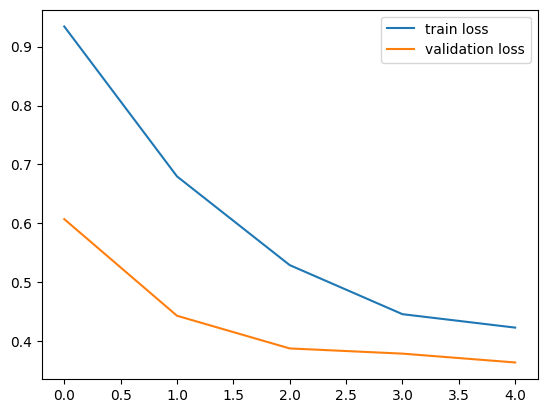

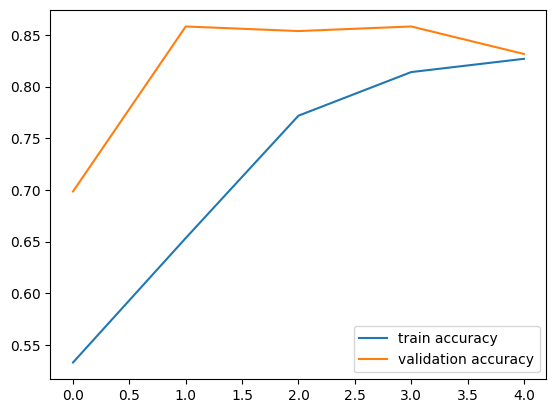

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



In [ ]:

# Predictive System

Path of the image to be predicted: /content/download.jpeg


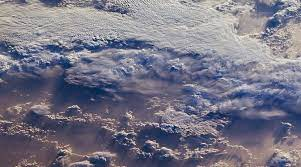

1/1 [==============================] - 0s 19ms/step
[[0.6428403  0.34899175 0.00179804 0.00636988]]
0
Cloudy


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped= np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if (input_pred_label == 0):

  print('Cloudy')

if(input_pred_label == 1):

  print('Desert')

if(input_pred_label == 2):

  print('Grassfeild')

if(input_pred_label == 3):

  print('Water')




